In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [121]:
df = pd.read_csv("./output/cross-section.csv")

In [122]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [123]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

Rich Home Share:  0.069
Poor Home Share:  0.067


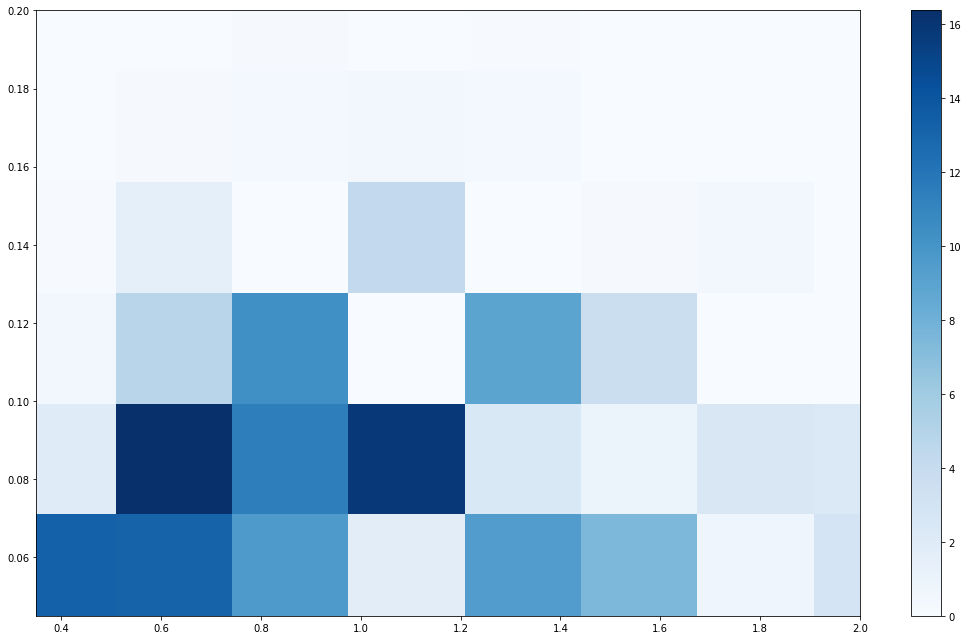

In [129]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

ax.set_ylim(0.045,0.20)
ax.set_xlim(0.35,2.0)

plt.show()

In [57]:
vmax

0.39884436334711704

In [92]:
oise = np.random.normal(0, 0.1, [len(df),1])

In [95]:
len(df)


100000

In [97]:
(1 - df.homeshare) + np.random.normal(0, 0.1, [len(df)])

0        0.179670
1        0.202887
2        0.203162
3        0.112230
4       -0.008870
           ...   
99995    0.020971
99996   -0.047726
99997    0.064381
99998    0.131997
99999   -0.134737
Name: homeshare, Length: 100000, dtype: float64